In [1]:
import os
import glob
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import curve_fit

import pickle

import seaborn as sns
sns.set()

import gsf_ims_fitness as fitness

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
main_directory = os.getcwd()
main_directory

'C:\\Users\\djross\\Documents\\Sequencing_data_downloads\\2019-10-16_IPTG_Select-DNA-5-plates\\MiSeq'

In [4]:
data_directory = main_directory + "\\barcode_analysis"
os.chdir(data_directory)
glob.glob("*sorted_counts.csv")

['2019-10-16_MiSeq.sorted_counts.csv',
 '2019-10-16_MiSeq.trimmed_sorted_counts.csv']

In [32]:
barcode_frame = fitness.BarSeqFitnessFrame(main_directory, barcode_file='2019-10-16_MiSeq.trimmed_sorted_counts.csv')

Importing BarSeq count data and plotting histogram for thresholding for experiment: 2019-10-16_IPTG_Select-DNA-5-plates
Importing BarSeq count data from file: 2019-10-16_MiSeq.trimmed_sorted_counts.csv


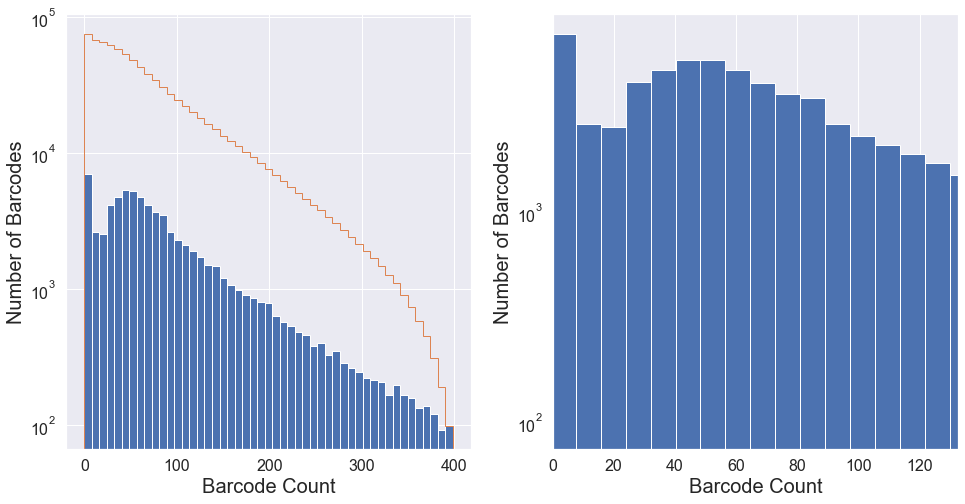

In [33]:
barcode_frame.plot_count_hist()

In [34]:
barcode_frame.trim_and_sum_barcodes()

Calculating read fraction for each barcode in each sample
Calculating read totals and fractions for each barcode in samples from first time point
BarSeqFitnessFrame saved as: 2019-10-16_IPTG_Select-DNA-5-plates_BarSeqFitnessFrame.pkl


In [35]:
barcode_frame.label_reference_sequences()

,RS_name,forward_BC,reverse_BC,total_counts
1,AO-B,CCTAGGACCTTCAAGATGTAAGATGTCAATTCGTAAC,TATTCGATATTGAACATCAATAGTAGGAACTACTACT,298999


,RS_name,forward_BC,reverse_BC,total_counts
2,AO-E,TTTGTAATTTCTGAACTTGAAGATAACATCTCATATC,AATTGGACCTCAAAGGTCCTTTTTTTAACCTCTGACA,274675


,RS_name,forward_BC,reverse_BC,total_counts
1426,RS01,TATGGCAACTGTCAGATCTAATTTTGCATATGATACA,AATTGCAACTATCACGTGAGTACTATAACTTTGAATT,408


,RS_name,forward_BC,reverse_BC,total_counts
17357,RS04,CATTACAATTATGACATATCAACTCCTATGTCCCATC,TATGCCATCTAGTACGTACCTAATAGTAAATTATAGC,133


,RS_name,forward_BC,reverse_BC,total_counts
37323,RS05,ACTAAAACATCTCAATTAGCAACTAATACCTCTAATC,CCTTTTAAGTTCGACGTTCATTCTTCGAGATCTTATG,70


,RS_name,forward_BC,reverse_BC,total_counts
14361,RS06,AATTGTATGTCGTAGTTGCAATGTGTGATGTTCGAAA,CTTAATAGCTTCAAGTTCCCTCCTAGTACATAATACC,151


,RS_name,forward_BC,reverse_BC,total_counts
1186,RS10,ACTCTAAGCTCCTAAATTGAAGTTCTGACATGTAACG,GGTCTTAGGTGTCATGTTTGTTGTTCCATTTTTAACG,431


,RS_name,forward_BC,reverse_BC,total_counts


,RS_name,forward_BC,reverse_BC,total_counts
19851,RS14,TTTTTAAAATATTAAATAAGAGTTTCTACATCAAACG,CATATAATTTCGAAGCTGTATCATTGCAAATGCCAGA,121


,RS_name,forward_BC,reverse_BC,total_counts
26388,RS15,CTTGAGAATTTTTACCTTTCAACTGGTACGTTTGATT,CCTGTTAAGTGCAAGTTCTATCCTGGTAGTTGAGACC,97


,RS_name,forward_BC,reverse_BC,total_counts
25638,RS16,CCTAGCAACTGCTAAGTCGTACGTACAATCTATAAAC,CATCATAATTTCGACATTCCTTATATCAGATGCGACT,99


,RS_name,forward_BC,reverse_BC,total_counts
6807,RS17,CTTCCGACCTATAATGTTTCATGTACTATGTCTTACC,TCTTTGAAGTGCTATTTGCGTCGTGTCAAATCATACC,225


,RS_name,forward_BC,reverse_BC,total_counts
26607,RS18,AGTCTGAGATATTATTTAGTATGTCCCATTTATTAAG,TGTAAAAATTGTCAACTGGTTCCTCAGAGTTATCAAC,96


,RS_name,forward_BC,reverse_BC,total_counts
29521,RS19,ACTCCTATCTAGTATGTCCTAGTTTAAACTTGAGACA,AGTAATATTTGCAACATGTTTCATTTGAACTCAAAAT,87


total reads: 8759667
reference sequence reads: 575592 (6.5709347170389005%)
BarSeqFitnessFrame saved as: 2019-10-16_IPTG_Select-DNA-5-plates_BarSeqFitnessFrame.pkl


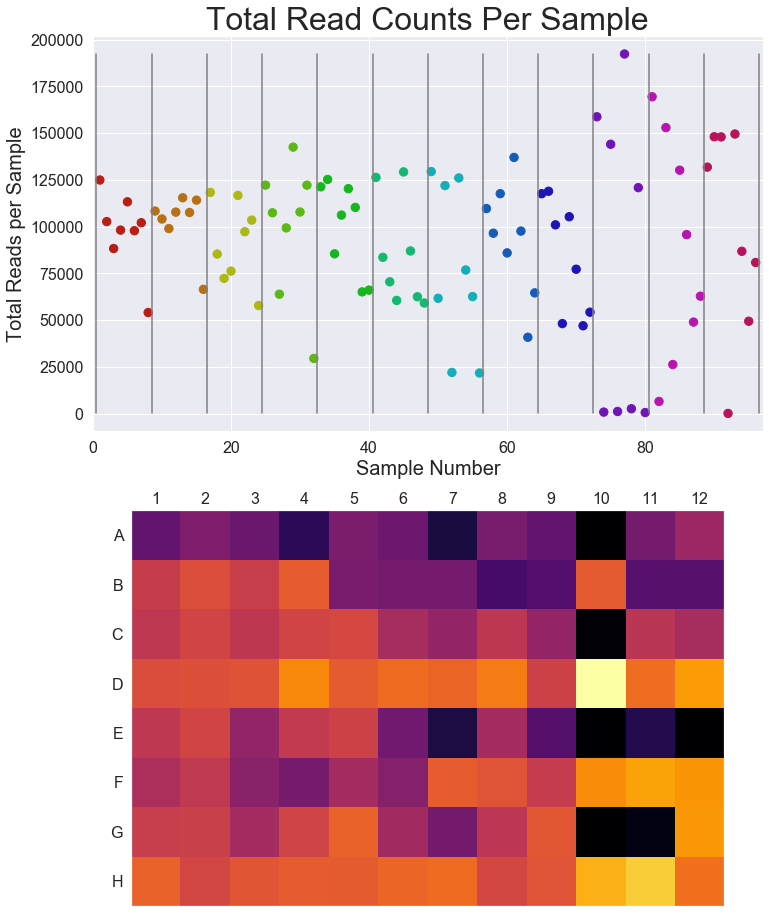

In [36]:
barcode_frame.plot_read_counts()

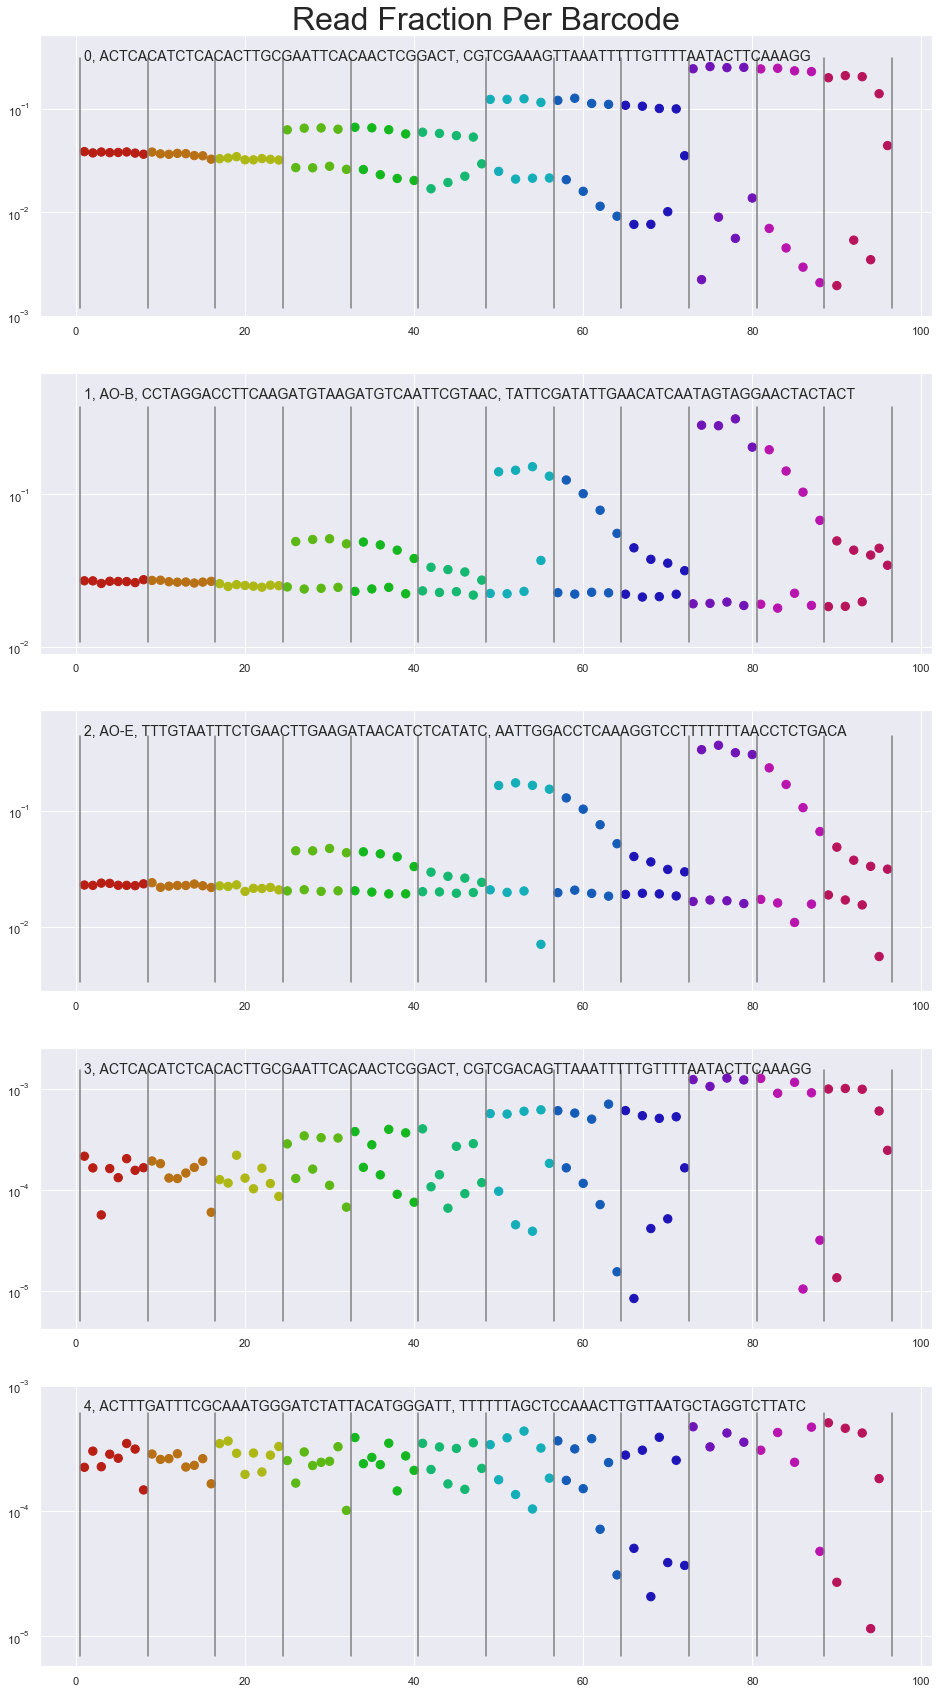

In [37]:
barcode_frame.plot_read_fractions(num_to_plot=5)

In [39]:
barcode_frame.barcode_frame[:15][["forward_BC", "reverse_BC", "total_counts", "possibleChimera", "parent_geo_mean"]]

,forward_BC,reverse_BC,total_counts,possibleChimera,parent_geo_mean
0,ACTCACATCTCACACTTGCGAATTCACAACTCGGACT,CGTCGAAAGTTAAATTTTTGTTTTAATACTTCAAAGG,717442,False,0.000000
1,CCTAGGACCTTCAAGATGTAAGATGTCAATTCGTAAC,TATTCGATATTGAACATCAATAGTAGGAACTACTACT,298999,False,0.000000
2,TTTGTAATTTCTGAACTTGAAGATAACATCTCATATC,AATTGGACCTCAAAGGTCCTTTTTTTAACCTCTGACA,274675,False,0.000000
3,ACTCACATCTCACACTTGCGAATTCACAACTCGGACT,CGTCGACAGTTAAATTTTTGTTTTAATACTTCAAAGG,3417,False,0.000000
4,ACTTTGATTTCGCAAATGGGATCTATTACATGGGATT,TTTTTTAGCTCCAAACTTGTTAATGCTAGGTCTTATC,2355,False,0.000000
5,GATGGCACATGTTACGTCCGACGTGACATCTATGAAG,TATGTGAGCTCGCACTTACATCCTTCCATTTGGCAGT,1627,False,0.000000
6,ACTCACATCTCACACTTGCGAATTCACAACTCGGACT,AATTGGACCTCAAAGGTCCTTTTTTTAACCTCTGACA,1484,True,443918.214709
7,GCTCGGAGGTTTTACCTCCCAGCTAAGAGATCTTAAA,ATTCTAAAGTTCAATATGCTTGTTATAACTTAGGAGT,1410,False,0.000000
8,AGTGATACATCTCACATATTAGCTTCAATGTTTAATT,CCTCCAATGTTACACGTATATCGTCGCATCTCACATA,1314,False,0.000000
9,TCTCCTATATCGTAATTCATAGGTCCTATCTCCAAGT,CTTGGAAGTTTCGAGTTACTTTGTTGAAACTGTAACG,1269,False,0.000000


In [40]:
barcode_frame.barcode_frame["parent_geo_mean"].max()/96

4824.5524646497515

In [43]:
def chimera_cut_line(x):
    return 0.0002 * x ** 1.5

In [49]:
barcode_frame.mark_actual_chimeras(chimera_cut_line=chimera_cut_line)

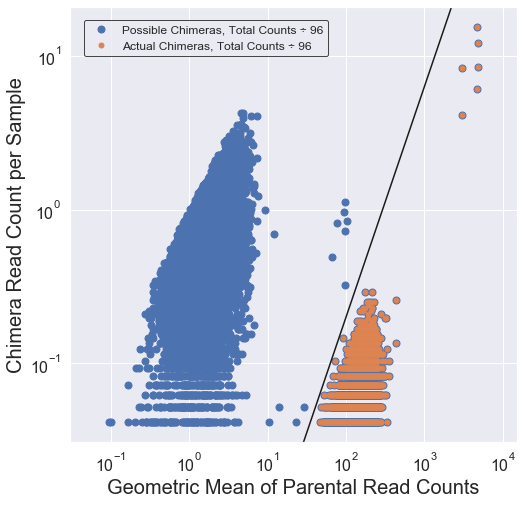

In [50]:
barcode_frame.plot_chimera_plot(chimera_cut_line=chimera_cut_line)

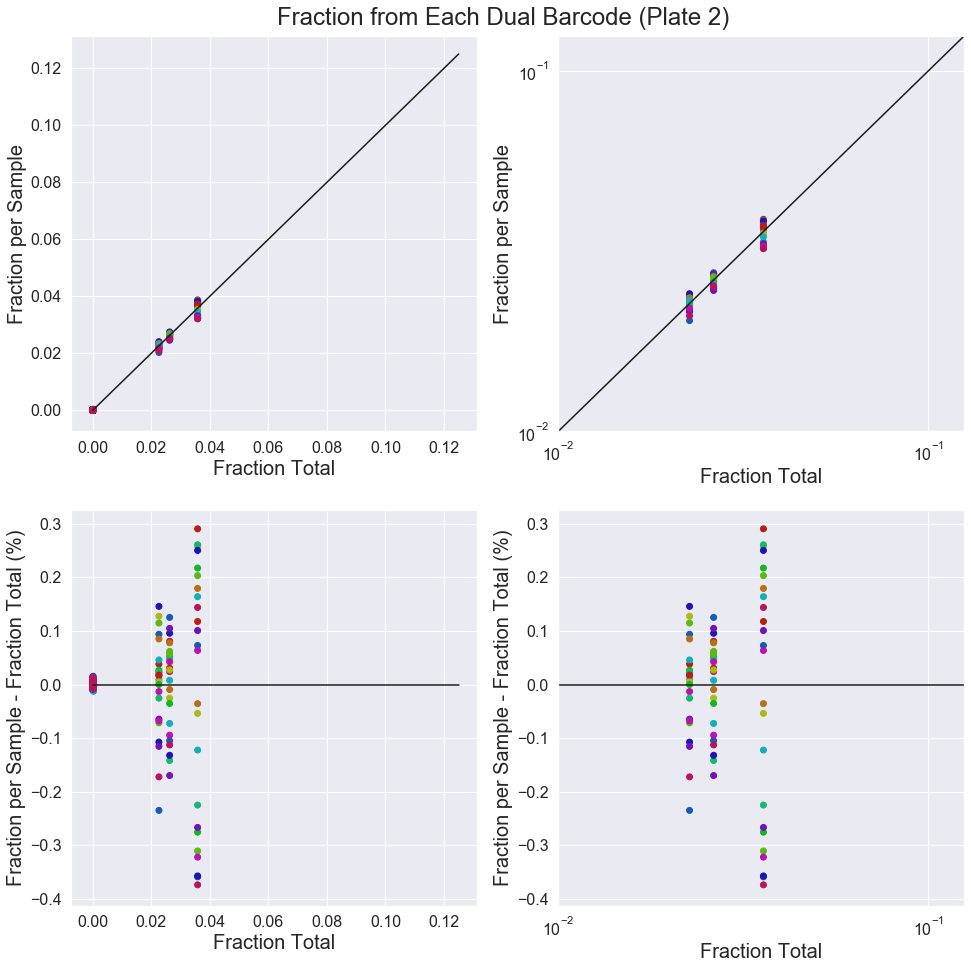

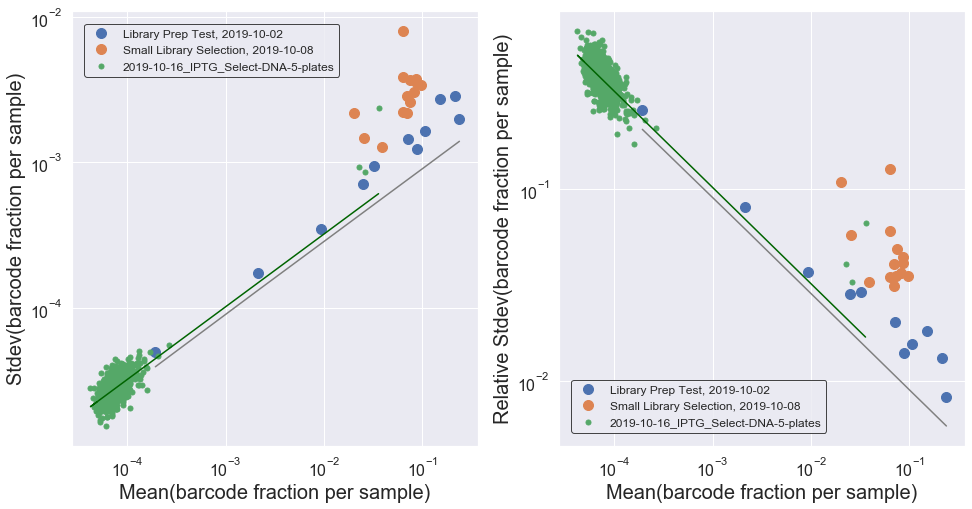

In [51]:
barcode_frame.plot_stdev()

In [54]:
len(barcode_frame.barcode_frame)

76796

In [ ]:
%%time
barcode_frame.fit_barcode_fitness()

Fitting to log(barcode ratios) to find fitness for each barcode in 2019-10-16_IPTG_Select-DNA-5-plates
AO-B:   RS_name                                     read_count_0_2
1    AO-B  [3386, 2300, 3039, 2693, 2953, 2645, 3071, 303...
AO-E:   RS_name                                     read_count_0_2
2    AO-E  [2876, 2112, 2595, 2321, 2611, 2228, 2634, 259...


In [ ]:
barcode_frame.plot_fitness_curves(plot_range=[0,20], include_ref_seqs=True)

In [ ]:
barcode_frame.barcode_frame